In [1]:
%matplotlib inline
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Lib.BEM_Solver.BEM_2D import *
from Lib.Domain_Decomposition.Coupling_Main import *

In [2]:
def DirichletBC_func(Pts):
    #http://www.mhhe.com/engcs/mech/holman/graphics/samplech_3.pdf
    x,y=Pts[0],Pts[1]
    P_1=50
    P_m=50
    return P_m*np.sin(np.pi*x)+P_1
def ExactSol(Pts):
    x,y=Pts[0],Pts[1]
    P_1=50
    P_m=50
    
    P=P_m*np.sinh(np.pi*y)/np.sinh(np.pi)*np.sin(np.pi*x)+P_1
    U=-P_m*np.sinh(np.pi*y)/np.sinh(np.pi)*np.cos(np.pi*x)*np.pi
    V=-P_m*np.cosh(np.pi*y)/np.sinh(np.pi)*np.sin(np.pi*x)*np.pi
    return P,U,V


[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16 E-T(16,0)
[Mesh] Number of Nodes:48 E-T(48-0)
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 50), (0, 50), (1, 50)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(2, <function DirichletBC_func at 0x0000000006B48598>)]


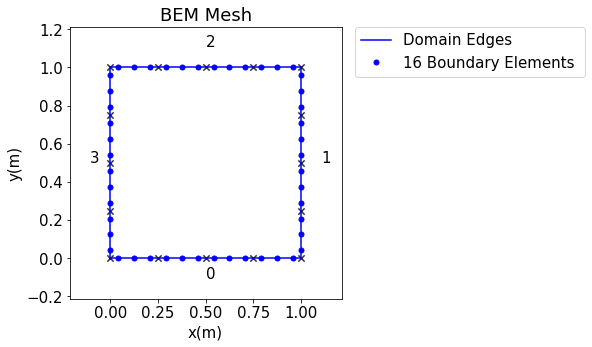

In [116]:
BEM_Case1=BEM2D()

#1.Build Mesh-#Anti-clock wise for internal domain
Boundary_vert=[(0.0, 0.0), (1.0, 0.0),(1.0,1.0),(0.0,1.0)]  #bottom
element_esize=0.3

BEM_Case1.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")

#2.Set Boundary condition
bc0=[(3,50),(0,50),(1,50)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)#,RobinBC=bc1)
bc_func=[(2,DirichletBC_func)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc_func,mode='func',update=1)#,RobinBC=bc1)

#bc0=[(3,100)]
#bc1=[(1,-50)]
#BEM_Case1.set_BoundaryCondition(DirichletBC=bc0,NeumannBC=bc1)#,RobinBC=bc1)

#3.Set Domain Properties - permeability tensor
k11=1
k12=2
k22=5
k_tensor=[k11,k12,k22]
BEM_Case1.SetProps(k_tensor)

#Check Mesh
BEM_Case1.plot_Mesh()
#Check Node,BC if necessary
#BEM_Case1.Mesh.print_debug()

[Visulization] Plotting Solution


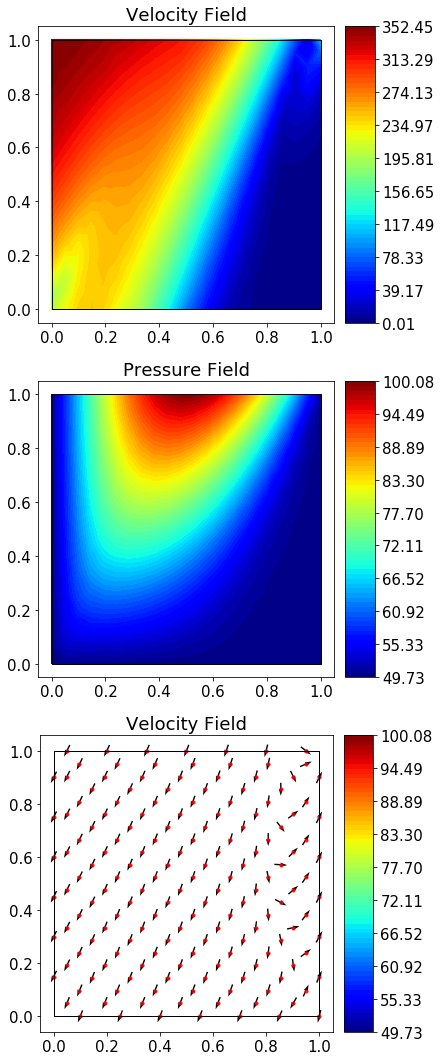

In [117]:
puv=BEM_Case1.Solve()
xx=BEM_Case1.PostProcess.plot_Solution()
#BEM_Case1.PostProcess.print_Solution()

In [74]:
BEM_Case1.get_Solution((0.5001,0.0))

(49.99999999999999, 5.949565160502471e-08, -13.602879862714804)

In [92]:
BEM_Case1.get_Solution((0.01,0.98))

(51.467197395790656, -147.27050608907115, -3.993965344213798)

In [91]:
np.array(Field_Solve(0.01,0.98,BEM_Case1.BEs_edge,BEM_Case1.Mesh))

array([  51.4671974 , -147.27050609,   -3.99396534])

In [78]:
BEM_Case1.BEs_edge[5]

Element Type=Quad element
Num of DOF=3
Boundary Marker ID=1
Pts=(1.0,0.0) (1.0,0.1) (1.0,0.2) 
BD_Vals[50, 50, 50]) 
P[50, 50, 50]) 
Q[-1.4249940819095146, -4.342572690836535, -7.450682272638253]) 
U[-1.4291054490587924, -4.34482368794961, -7.452633868175661]) 
V[0.011067831048503363, -0.00777871902009564, 0.011186353800971653]) 

In [79]:
BEM_Case1.BEs_edge[5].eval_P((0.01,1.0))

50.00000000000182

## Solution Verification

In [113]:
Pts1,Pts2=(0.0,0.98),(1.0,0.98)

#Exact Solution
X0,PUV_exact=BEM_Case1.PostProcess.plot_Solution_overline(Pts1,Pts2,func=ExactSol,plot=False)
#BEM Solution
X0,PUV=BEM_Case1.PostProcess.plot_Solution_overline(Pts1,Pts2,plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SquareDomain_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SquareDomain_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SquareDomain_v.csv', comments='%',delimiter=',')

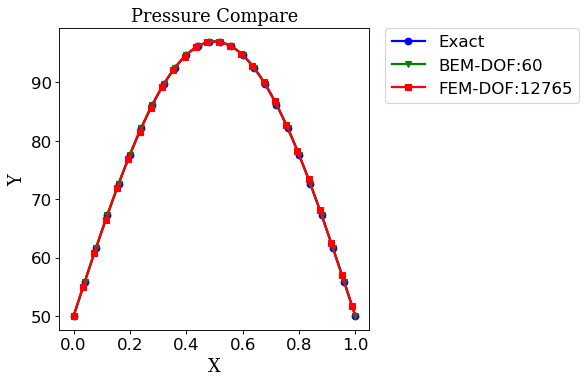

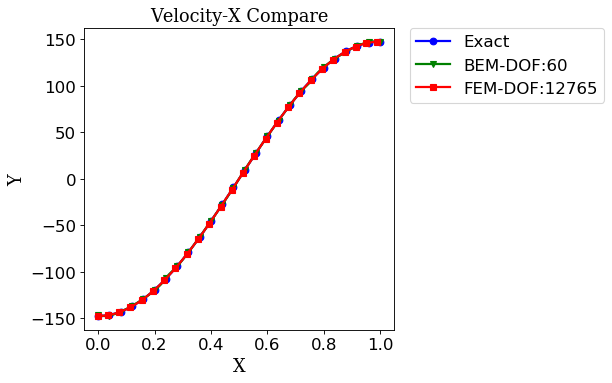

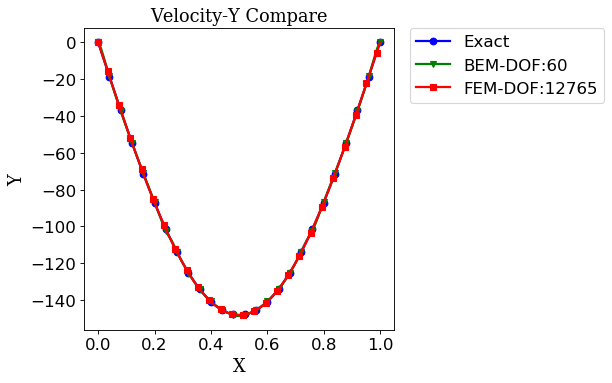

In [114]:
#Compare Pressure
DataNames=['Exact','BEM-DOF:60','FEM-DOF:12765']
DataSetX=[X0,X0,P[:,0]]

DataSetY=[PUV_exact[:,0],PUV[:,0],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetY=[PUV_exact[:,1],PUV[:,1],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetY=[PUV_exact[:,2],PUV[:,2],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')

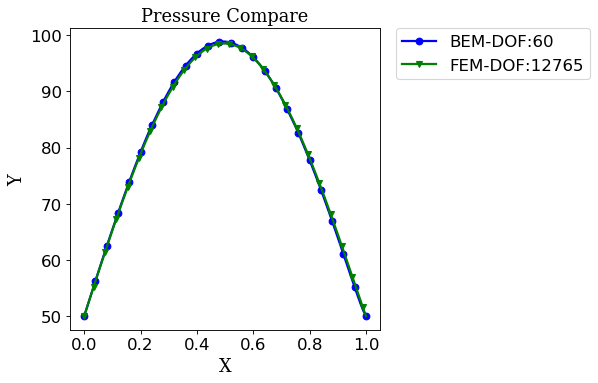

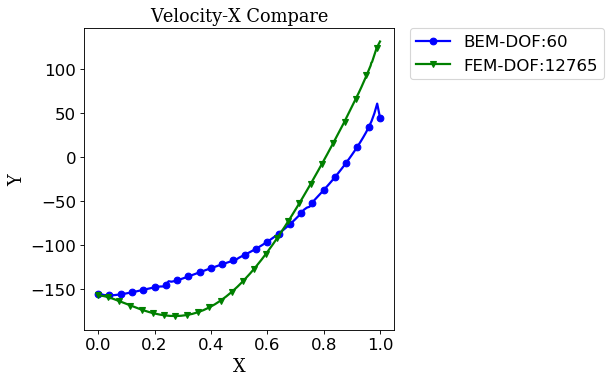

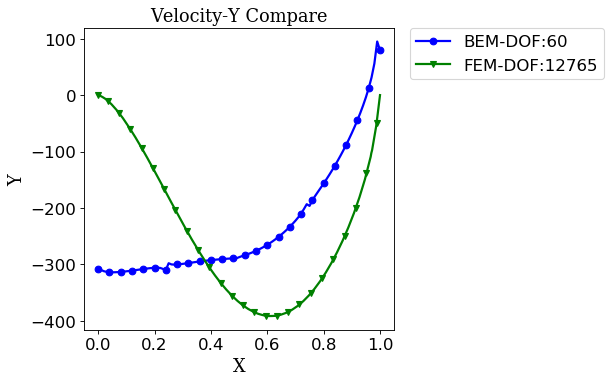

In [120]:
Pts1,Pts2=(0.0,0.98),(1.0,0.98)

#BEM Solution
X0,PUV=BEM_Case1.PostProcess.plot_Solution_overline(Pts1,Pts2,plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SquareDomain_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SquareDomain_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SquareDomain_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['BEM-DOF:60','FEM-DOF:12765']
DataSetX=[X0,P[:,0]]

DataSetY=[PUV[:,0],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetY=[PUV[:,1],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetY=[PUV[:,2],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')

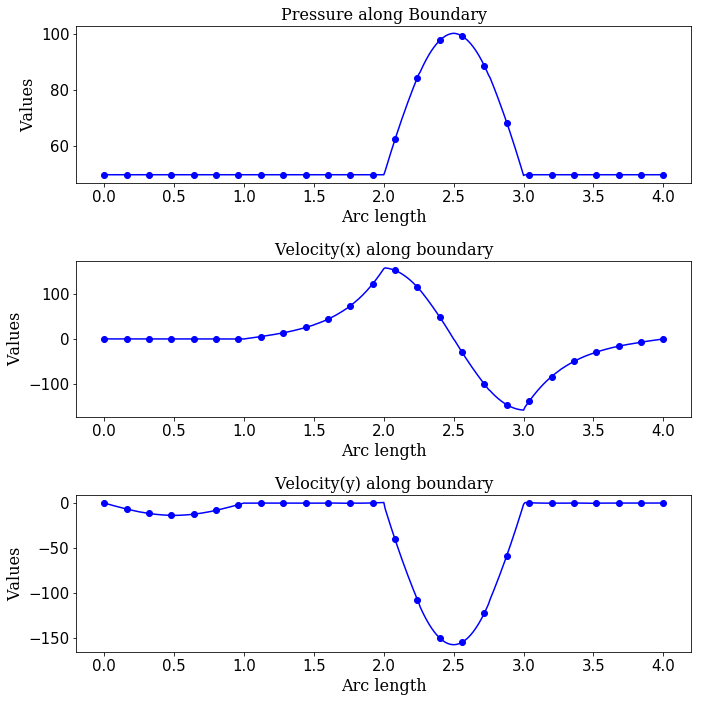

In [115]:
xx=BEM_Case1.PostProcess.plot_SolutionBD()

[Visulization] Plotting Solution


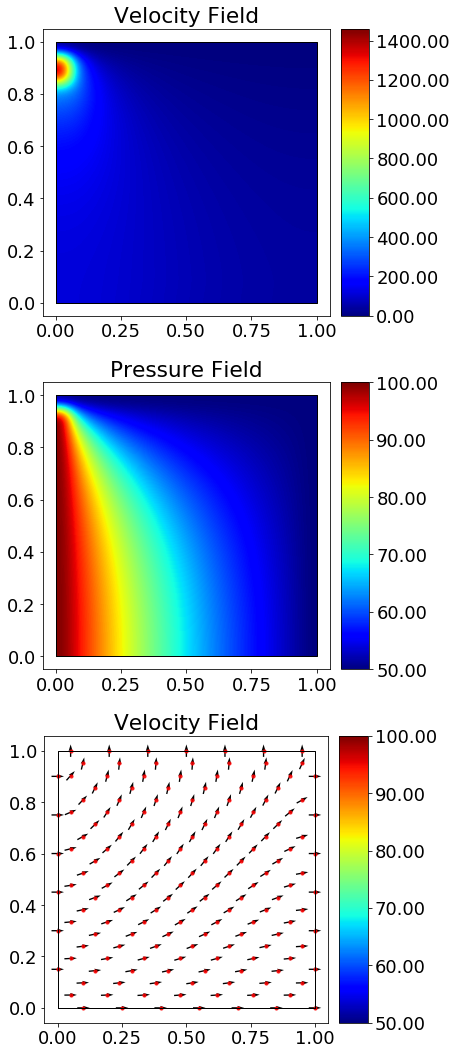

In [37]:
%lprun -f Field_Solve BEM_Case1.PostProcess.plot_Solution()

[Visulization] Plotting Solution


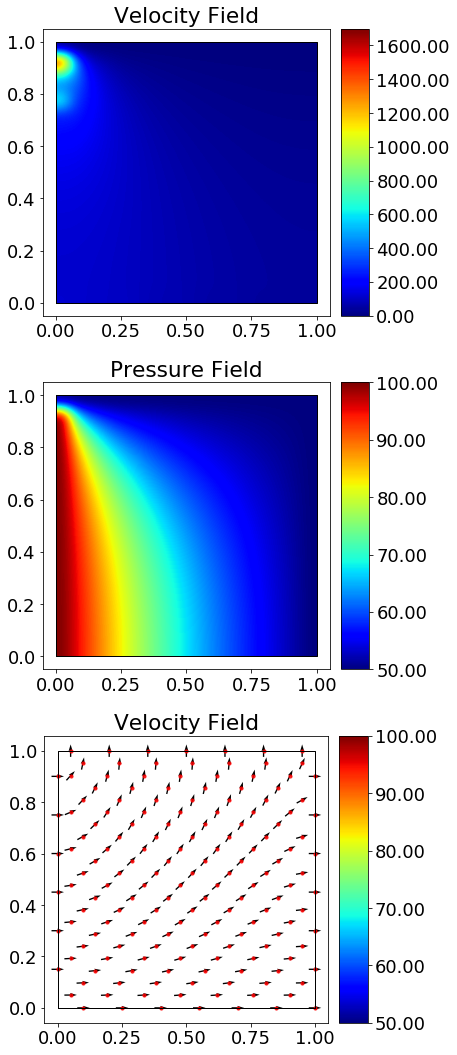

In [30]:
%lprun -f BEM_Case1.PostProcess.plot_Solution BEM_Case1.PostProcess.plot_Solution()

In [13]:
a=[1,2,3]
a=[0 for i in a]

In [19]:
a=[1]*10

In [20]:
a

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]